In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
obs = pd.read_csv('data/observations.csv')
print(obs.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [3]:
species = pd.read_csv('data/species_info.csv')
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [44]:
full_data = pd.merge(obs, species, on='scientific_name')
print(full_data.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  
                             park_name  observations
0                  Bryce National 

In [5]:
parks = full_data.park_name.unique()
print(parks, end="\n\n")

category = full_data.category.unique()
print(category, end="\n\n")

conservation_status = full_data.conservation_status.unique()
print(conservation_status)

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']

['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']

[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


                             park_name  observations
0                  Bryce National Park        633291
1  Great Smoky Mountains National Park        474863
2            Yellowstone National Park       1587641
3               Yosemite National Park        949452


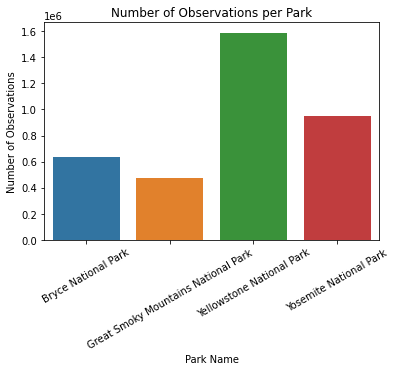

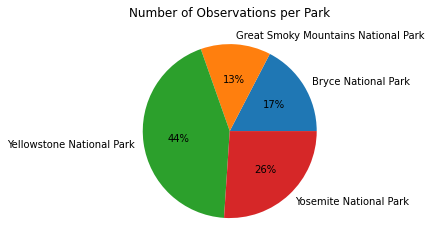

<Figure size 432x288 with 0 Axes>

In [45]:
each_park_obvervation = full_data.groupby('park_name').observations.sum().reset_index()
print(each_park_obvervation.head())

sns.barplot(x='park_name', y='observations', data=each_park_obvervation)
plt.subplot().set_title('Number of Observations per Park')
plt.xticks(rotation=30)
plt.xlabel("Park Name")
plt.ylabel("Number of Observations")
plt.show()
plt.clf()

plt.pie(each_park_obvervation.observations, labels=each_park_obvervation.park_name, autopct='%1.0f%%')
plt.subplot().set_title('Number of Observations per Park')
plt.subplot().set_facecolor('white')
plt.show()
plt.clf()

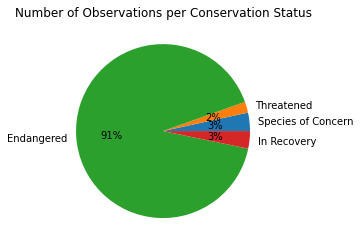

<Figure size 432x288 with 0 Axes>

In [60]:
# drop NaN values
conservation_status_dropna = full_data.dropna(subset=['conservation_status'])

plt.pie(conservation_status_dropna.groupby('conservation_status').observations.sum(), labels=conservation_status_dropna.conservation_status.unique(), autopct='%1.0f%%')
plt.subplot().set_title('Number of Observations per Conservation Status')
plt.subplot().set_facecolor('white')
plt.show()
plt.clf()